In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

These libraries provide tools for data handling, numeric computation, and visualization.

In [2]:
df = pd.read_csv(r"C:\Users\Niharika\Zomato Data Analysis Using Python\Zomato-data- (1).csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [4]:
df.info()
print(df.shape)     
print(df.columns) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB
(148, 7)
Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')


In [7]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)
df['rate'] = df['rate'].apply(handleRate)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


The ratings are now numeric, making it possible to perform accurate statistical and visual analysis.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [9]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

There are no missing values in the dataset, so all columns are complete and ready for analysis.

Text(0.5, 1.0, 'Exploring Restuarant Type')

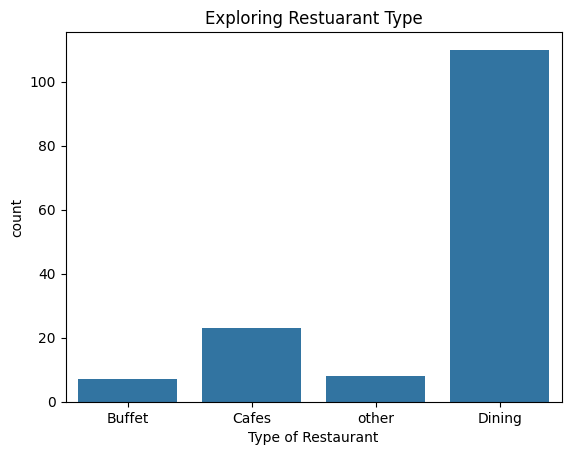

In [19]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of Restaurant')
plt.title('Exploring Restuarant Type')

Delivery and Cafes receive the highest number of votes, suggesting they are most favored by the general public. 

In [22]:
groupedData = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':groupedData})
print(result)

                 votes
listed_in(type)       
Buffet            3028
Cafes             6434
Dining           20363
other             9367


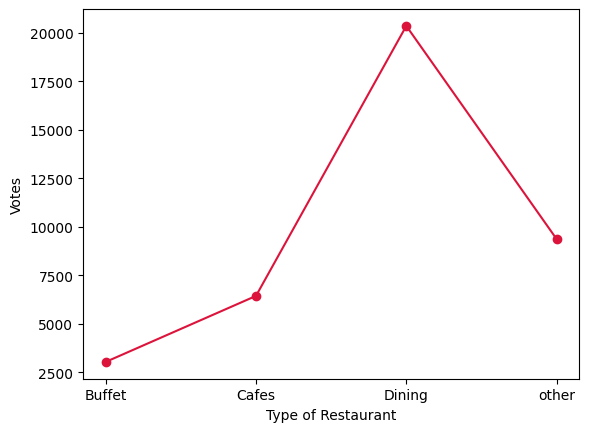

In [25]:
plt.plot(result,c='crimson',marker='o')
plt.xlabel("Type of Restaurant")
plt.ylabel("Votes")
plt.show()

Dining restaurants are preferred by a larger number of individuals.

In [28]:
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes']==max_votes,'name']
print("The Restaurant with maximum votes :")
print(restaurant_with_max_votes)

The Restaurant with maximum votes :
38    Empire Restaurant
Name: name, dtype: object


Text(0.5, 1.0, 'Restaurants Offering Online Orders')

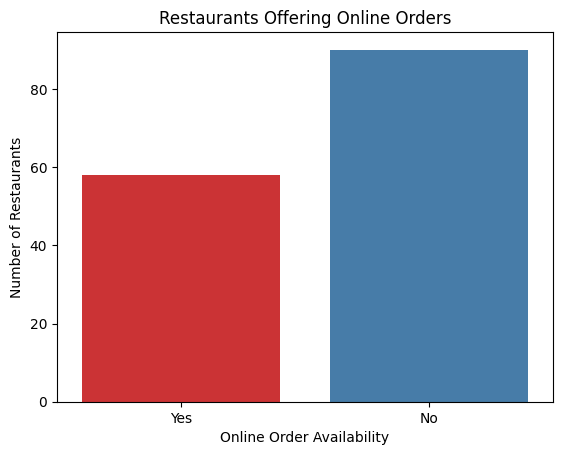

In [44]:
sns.countplot(x=df['online_order'], hue='online_order',data=df,palette='Set1',dodge=False )
plt.xlabel('Online Order Availability')
plt.ylabel('Number of Restaurants')
plt.title('Restaurants Offering Online Orders')

This suggests that a majority of the restaurants do not accept online orders.

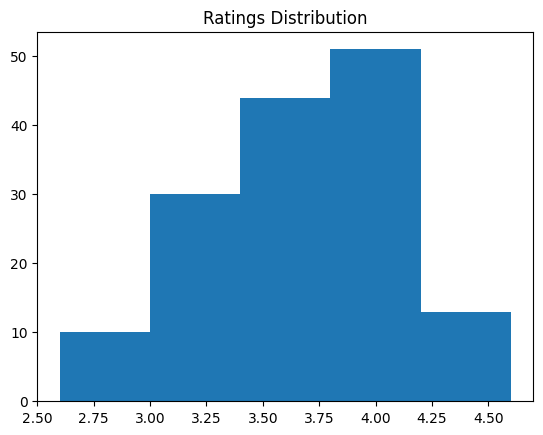

In [45]:
plt.hist(df['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

The majority of restaurants received ratings ranging from 3.5 to 4.

Text(0, 0.5, 'No of couples')

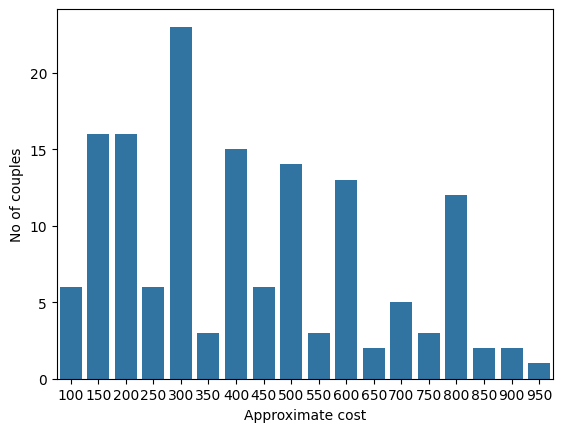

In [50]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.xlabel("Approximate cost")
plt.ylabel("No of couples")

The majority of couples prefer restaurants with an approximate cost of 300 rupees.

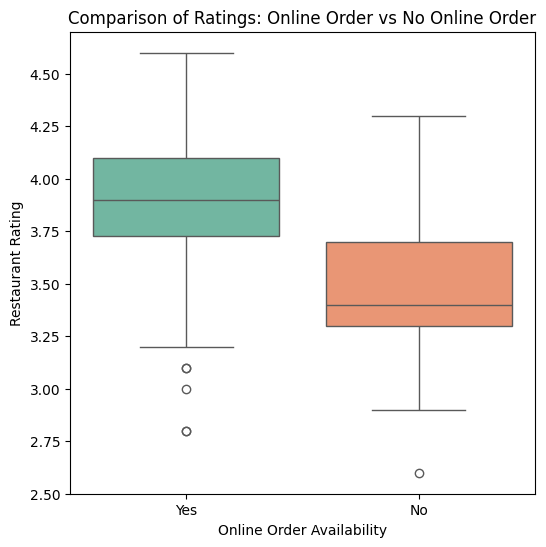

In [60]:
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order',y='rate',hue='online_order',data=df,palette='Set2')
plt.xlabel('Online Order Availability')
plt.ylabel('Restaurant Rating')
plt.title('Comparison of Ratings: Online Order vs No Online Order')
plt.show()

 Offline orders received lower ratings in comparison to online orders which obtained excellent ratings.

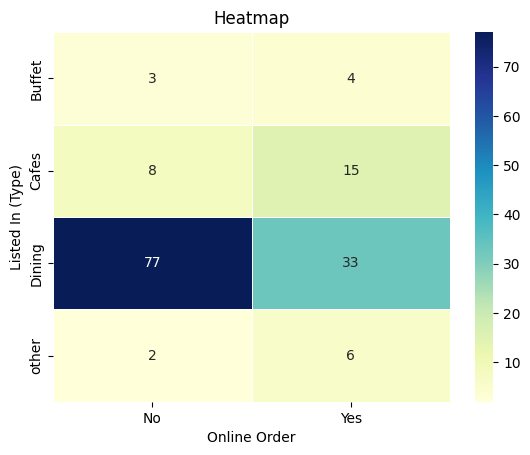

In [ ]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d', linewidths=0.5)
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

Final Conclusion:

The Zomato dataset analysis shows that Dining and Cafes are the most common and popular restaurant types, with moderate pricing (₹200–₹600) preferred by couples. Restaurants offering online orders, especially cafes and casual eateries, generally receive slightly higher ratings, while traditional dining relies more on offline service. Votes and ratings are skewed, indicating that a few highly popular restaurants dominate customer attention. Overall, moderate cost, good ratings, and online availability are key factors influencing customer preferences, suggesting that restaurants can focus on online delivery and quality service to attract more patrons.